In [1]:
%matplotlib inline
# Load the "autoreload" extension
%load_ext autoreload
# always reload modules
%autoreload 2
# black formatter for jupyter notebooks
# %load_ext nb_black
# black formatter for jupyter lab
%load_ext lab_black

%run ../../src/notebook_env.py


---------------------------------
Working on the host: imarevic-pc

---------------------------------
Python version: 3.10.9 | packaged by conda-forge | (main, Feb  2 2023, 20:20:04) [GCC 11.3.0]

---------------------------------
Python interpreter: /home/imarevic/anaconda3/envs/srh/bin/python3.10


# Varianzanalyse - ANOVA

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import f, f_oneway, ttest_ind
import statsmodels.api as smi
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In diesem Abschnitt wird eine Methode namens <a href="https://de.wikipedia.org/wiki/Varianzanalyse">Varianzanalyse</a> (englisch analysis of variance, kurz ANOVA) erörtert, mit der mehrere Mittelwerte einer Grundgesamtheit verglichen werden können.

Genauer gesagt geht es um die sogenannte einfaktorielle Varianzanalyse ({cite:t}`fahrmeirstatistik` s.478). Bei dieser Art der ANOVA werden die Mittelwerte einer Variablen verglichen, die sich aus der Klassifizierung durch *eine* andere Variable, dem sogenannten **Faktor**, ergeben. Um das Konzept zu veranschaulichen, wollen wir ein einfaches Beispiel entwerfen. Angenommen, wir vergleichen die mittleren Jahresgehälter der in Deutschland lebenden Personen, gruppiert nach Bundesländern, dann erhalten wir $16$ Mittelwerte der Jahresgehälter, einen für jedes Bundesland. In diesem Beispiel ist die Bundeslandvariable also eine Klassifikationsvariable, der so genannte Faktor.

Bitte beachten Sie, dass die einfaktorielle Varianzanalyse die Verallgemeinerung des $2$-Stichproben $t$-Tests auf mehr als zwei Grundgesamtheiten ist.

## Einfaktorielle ANOVA

Die grundlegende Logik einer einfaktoriellen ANOVA besteht darin, aus jeder Gruppe unabhängige Zufallsstichproben zu ziehen, dann die Stichprobenmittelwerte für jede Gruppe zu berechnen und anschließend die Variation der Stichprobenmittelwerte zwischen den Gruppen mit der Variation innerhalb der Gruppen zu vergleichen. Schließlich wird auf der Grundlage einer Teststatistik entschieden, ob die Mittelwerte der Gruppen gleich sind oder nicht.

Auf der Grundlage dieser Logik benötigen wir quantitative **Maße für die Variabilität**. Daher teilen wir die Gesamtvariabilität in zwei Segmente auf: Eines, das die **Variabilität zwischen den Gruppen** berücksichtigt, und das andere, das die **Variabilität innerhalb der Gruppen** berücksichtigt.

### Maße der Variabilität

Wir führen drei quantitative Maße für die Variation ein:

- Summe der Gesamtquadrate (SST)
- Summe der Gruppenquadrate (SSG)
- Summe der Fehlerquadrate (SSE)

Die **Summe der Gesamtquadrate (SST)** ist ein Maß für die Gesamtvariabilität der Variablen. Sie ist gegeben durch

$$SST = \sum_{i=1}^n(x_i-\bar x)^2\text{,}$$

wobei $x_i$ den Beobachtungen in den Stichproben entspricht und $\bar x$ für den Gesamtmittelwert aller Stichproben steht.

Die **Summe der Gruppenquadrate (SSG)** ist ein Maß für die Variabilität zwischen Gruppen und entspricht der quadrierten Abweichung der Gruppenmittelwerte vom Gesamtmittelwert, gewichtet mit dem Stichprobenumfang.

$$SSG = \sum_{i=1}^n n_j(\bar x_i-\bar x)^2$$

Dabei steht $n_j$ für den Stichprobenumfang der Gruppe $j$, $\bar{x}_i$ für den Mittelwert der Gruppe $j$ und $\bar{x}$ für den Gesamtmittelwert der Stichprobe.

Die **Summe der Fehlerquadrate ($SSE$)** schließlich ist ein Maß für die Variabilität innerhalb der Gruppen. Sie steht im Zusammenhang mit der unerklärten Variabilität, d. h. der Variabilität, die nicht durch die Gruppenvariable erklärt werden kann. Die Summe der Fehlerquadrate ist gegeben durch

$$SSE = \sum_{i=1}^n (n_j-1)s_j^2\text{,}$$

wobei $n_j$ den Stichprobenumfang für Gruppe $j$ und $s^2_{j}$ die Varianz von Gruppe $j$ bezeichnet. Alternativ kann man $SSE$ sowie die Differenz von $SST$ und $SSG$ berechnen

$$SSE = SST-SSG\text{.}$$

### Maße der mittleren Variabilität

Bisher haben wir Maße für die Gesamtvariabilität ($SST$), die Variabilität zwischen Gruppen ($SSG$) und die Variabilität innerhalb von Gruppen ($SSE$) berechnet. Um eine durchschnittliche Variabilität zu erhalten, skalieren wir im nächsten Schritt diese Variabilitätsmaße mit dem Stichprobenumfang (genauer gesagt mit den Freiheitsgraden, $df$).

Die **Freiheitsgrade** werden für jede Unterteilung der Variabilität (Gesamtvariabilität, Variabilität zwischen Gruppen und Variabilität innerhalb von Gruppen) definiert.

-    Gesamtvariabilität

$$df_T = n-1\text{,}$$

wobei $n$ den Gesamtumfang der Stichprobe bezeichnet. den Gesamtumfang der Stichprobe bezeichnet.

- Variabilität zwischen den Gruppen

$$df_G=k-1\text{,}$$

wobei $k$ die Anzahl der Gruppen bezeichnet.
den Gesamtumfang der Stichprobe bezeichnet.

- Variabilität innerhalb der Gruppe

$$df_E = n-k\text{.}$$

Nun können wir die **mittleren Quadrate** für die Variabilität zwischen den Gruppen und die Variabilität innerhalb der Gruppen berechnen. Die durchschnittliche Variabilität zwischen und innerhalb der Gruppen wird als die Gesamtvariabilität, skaliert mit den zugehörigen Freiheitsgraden, berechnet.

- Mittlere Variabilität zwischen den Gruppen

$$MSG = \frac{SSG}{df_G}$$

- Mittlere Variabilität innerhalb der Gruppe

$$MSE = \frac{SSE}{df_E}$$

### Teststatistik und $p$-Wert

Schließlich vergleichen wir die mittlere Variation zwischen den Gruppen, $MSG$, mit der Variation innerhalb der Gruppe, $MSE$. Daher berechnen wir das Verhältnis zwischen der durchschnittlichen Variation zwischen den Gruppen ($MSG$) und der Variation innerhalb der Gruppen ($MSE$), das mit $F$ bezeichnet wird.

$$F= \frac{MSG}{MSE}$$

Die $F$-Statistik hat die $F$-Verteilung (benannt nach <a href="https://de.wikipedia.org/wiki/Ronald_Aylmer_Fisher">Sir Ronald A. Fisher</a>) mit

$$df = (k-1, n-k)\text{,}$$

wobei $k$ für die Anzahl der Gruppen und $n$ für den Stichprobenumfang steht. Große Werte der $F$-Werte zeigen an, dass die Variation zwischen den Stichprobenmittelwerten der Gruppen im Verhältnis zur Variation innerhalb der Gruppe groß ist. Darüber hinaus können wir den $p$-Wert für jeden gegebenen $F$-Wert berechnen. Wenn der $p$-Wert klein ist, liefern die Daten überzeugende Beweise dafür, dass sich mindestens ein Paar von Gruppenmittelwerten voneinander unterscheidet. Ist der $p$-Wert groß, liefern die Daten keinen überzeugenden Beweis dafür, dass sich zumindest ein Paar von Gruppenmittelwerten voneinander unterscheidet, und die beobachteten Unterschiede in den Stichprobenmittelwerten sind somit auf Stichprobenvariabilität (oder Zufall) zurückzuführen.

### Einfaktorielle ANOVA-Tabellen

Wie oben dargestellt, umfasst die einfache Varianzanalyse mehrere Analyseschritte. Dabei ist eine gängige Methode zur Darstellung einer einfachen ANOVA die so genannte **einfaktorielle ANOVA-Tabelle**. Der allgemeine Aufbau einer solchen Tabelle ist unten dargestellt.

|Quelle|$df$|Summe der Quadrate (SS)| Mittlere Quadrate (MS)|$F$-Statistik|$p$-Wert|
|---|---|---|---|---|---|
|Gruppe/Klasse|$k-1$|$SSG$|$MSG = \frac{SSG}{k-1}$ | $F=\frac{MSG}{MSE}$ | $p$|
|Fehler/Residuen|$n-k$|$SSE$|$MSE=\frac{SSE}{n-k}$||
|Insgesamt|$n-1$|$SST$|||

## Einfaktorieller ANOVA-Hypothesentest

Der Zweck eines **einfaktoriellen ANOVA-Hypothesentests** ist der Vergleich von $k$ Grundgesamtheits-/Gruppenmittelwerten, $\mu_1, \mu_2,...,\mu_k$. 
Die folgenden Annahmen müssen erfüllt sein, damit eine einseitige ANOVA angewendet werden kann ({cite:t}`fahrmeirstatistik` s.485):

- Zufällige Stichproben
- Unabhängige Stichproben
- Für jede Grundgesamtheit ist die betrachtete Variable normalverteilt.
- Die Standardabweichungen der betrachteten Variable sind für alle Grundgesamtheiten gleich.

Ein einfaktorieller ANOVA-Hypothesentest folgt demselben schrittweisen Verfahren wie andere Hypothesentests. 

|||
|---|---|
|Schritt 1| Geben Sie die Nullhypothese $H_0$ und alternative Hypothese $H_A$ an|
|Schritt 2|Legen Sie das Signifikanzniveau,$\alpha$ fest|
|Schritt 3|Berechnen Sie den Wert der Teststatistik|
|Schritt 4|Bestimmen Sie den p-Wert|
|Schritt 5| Wenn $p \le \alpha$, $H_0$ ablehnen; ansonsten $H_0$ nicht ablehnen|
|Schritt 6|Interpretieren Sie das Ergebnis des Hypothesentests|

### Einfaktorieller ANOVA-Hypothesentest: Ein Beispiel

Um praktische Erfahrungen zu sammeln, wenden wir den **einfaktoriellen ANOVA-Hypothesentest** in einer Übung an. Dazu laden wir den `students` Datensatz. Sie können die Datei `students.csv` <a href="https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv">hier</a> herunterladen. Importieren Sie den Datensatz und geben Sie ihm einen passenden Namen.

In [3]:
# Lese Datei students.csv als Dataframe ein
students = pd.read_csv("../../data/students.csv")

Der `students` Datensatz besteht aus $8239$ Zeilen, von denen jede einen bestimmten Studenten repräsentiert, und $16$ Spalten, von denen jede einer Variable/einem Merkmal entspricht, das sich auf diesen bestimmten Studenten bezieht. Diese selbsterklärenden Variablen sind: *stud_id, name, gender, age, height, weight, religion, nc_score, semester, major, minor, score1, score2, online_tutorial, graduated, salary.*

Um den **einfaktoriellen ANOVA-Hypothesentest** zu veranschaulichen, untersuchen wir das mittlere Jahresgehalt der Absolventen, gruppiert nach ihrem Hauptstudienfach. Zur Verdeutlichung: In diesem Beispiel erfolgt die Klassifizierung/Gruppierung durch eine Variable, die Hauptvariable, den so genannten Faktor, wir führen also eine einfaktorielle ANOVA durch. In dieser Übung **wollen wir testen, ob sich das mittlere Jahresgehalt der Absolventen zwischen den Absolventen verschiedener Studienfächer unterscheidet.**

### Datenexploration und Aufbereitung

Wir beginnen unsere Datenanalyse mit dem Zufallsstichprobenverfahren. Wir ziehen eine Zufallsstichprobe von $275$ Studenten aus dem Datensatz mit Hilfe der `sample()` Methode in Python. Wir wollen sicherstellen, dass wir nur Studenten mit abgeschlossenem Studium in die Stichprobe aufnehmen, deshalb unterteilen wir die Daten des Dataframes zuvor in Python. Des Weiteren reduzieren wir unseren Datensatz auf die zwei Variablen von Interesse, die kategoriale Variable `major` und die numerische Variable `salary`. Dann zeigen wir die ersten $10$ Zeilen des Datensatzes an.

In [4]:
n = 275
data = students.loc[students["graduated"] == 1, ["major", "salary"]].sample(
    n, random_state=1
)
data.head(10)

,major,salary
5018,Biology,49976.94
4476,Political Science,27821.99
240,Environmental Sciences,37668.89
7165,Biology,60958.21
2488,Economics and Finance,59920.48
1193,Mathematics and Statistics,46116.22
241,Social Sciences,35881.74
2968,Economics and Finance,48456.79
1475,Mathematics and Statistics,61384.55
6764,Biology,61819.85


Aus reinem Interesse visualisieren wir die Zählungen für jede der $6$ verschiedenen Studienteilnehmer in unserer Stichprobe, indem wir ein Balkendiagramm erstellen. Wir verwenden die `barh()` Funktion aus der `mathplotlib` Bibliothek für die Darstellung.

Text(0.5, 0, 'Anzahl')

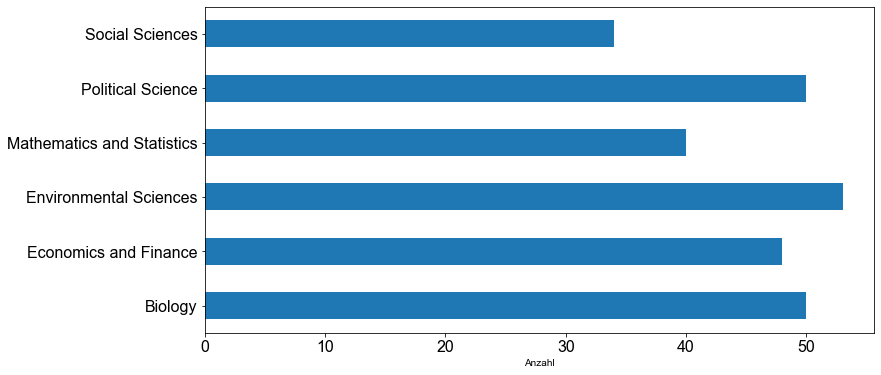

In [5]:
fig, ax = plt.subplots()
data.groupby("major")["salary"].count().plot.barh(ax=ax)
ax.set_ylabel("")
ax.set_xlabel("Anzahl")

Wir sehen, dass die verschiedenen Studienteilnehmer in unserer Stichprobe nicht gleich verteilt sind, aber das ist in Ordnung.

Bevor wir mit dem Hypothesentest beginnen, überprüfen wir, ob die Annahmen für den einfaktoriellen ANOVA-Hypothesentest erfüllt sind. Die Stichproben sind Zufallsstichproben und unabhängig. Das ist in Ordnung. Wir überprüfen die Normalitätsannahme, indem wir für jede gruppierte Variable ein Normalwahrscheinlichkeitsdiagramm (<a href="https://de.wikipedia.org/wiki/Quantil-Quantil-Diagramm">Q-Q-Diagramm</a>) erstellen.

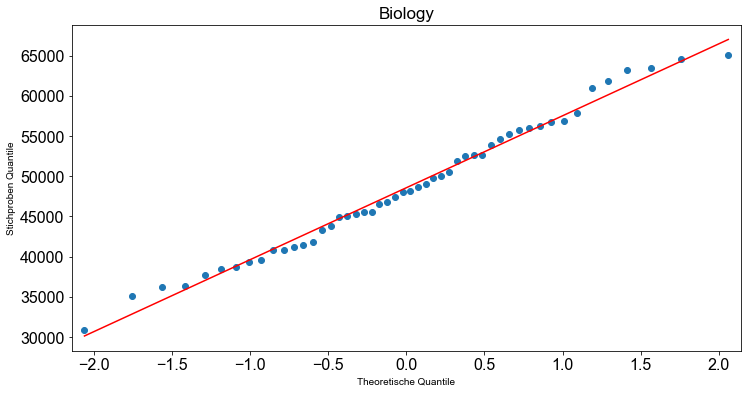

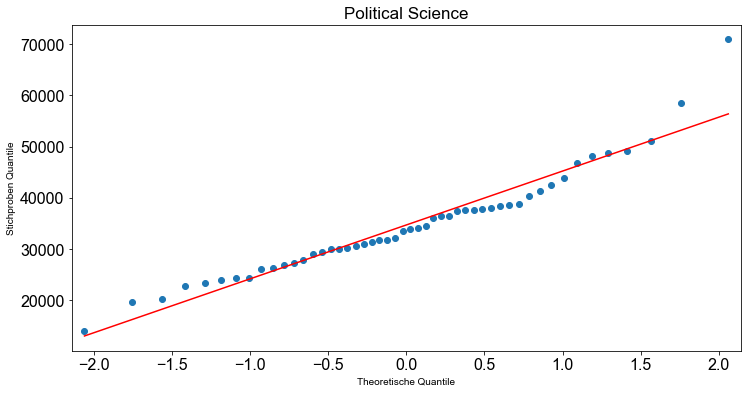

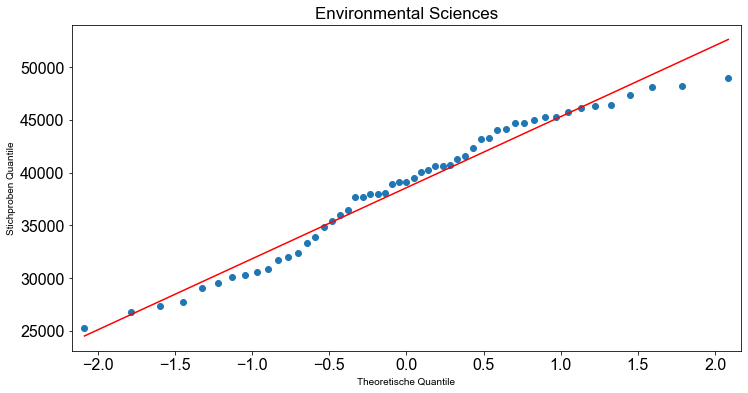

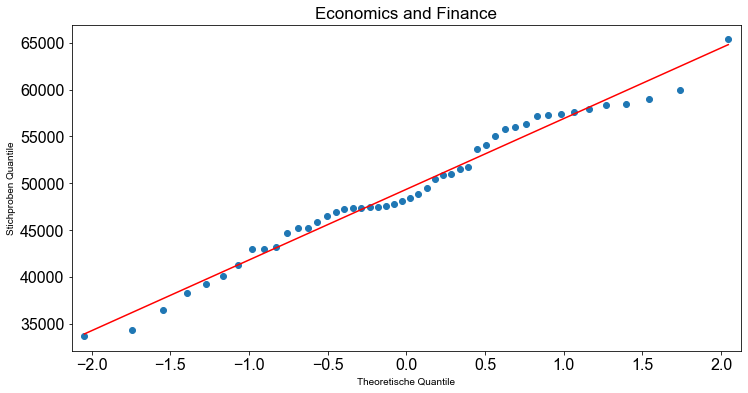

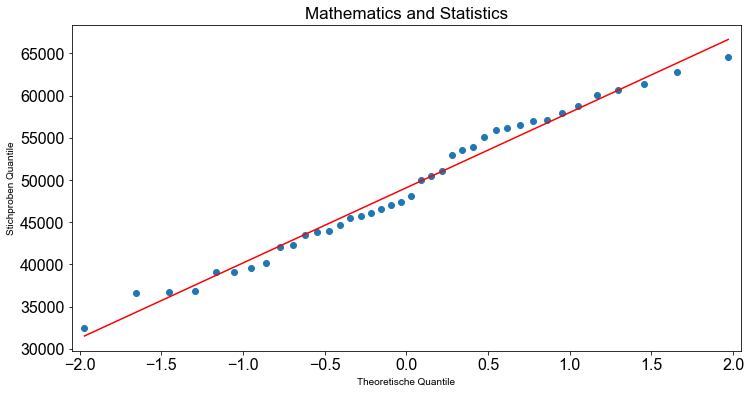

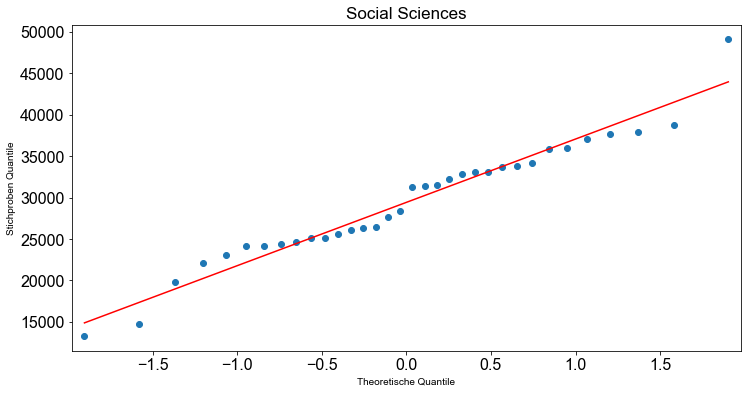

In [6]:
# Erzeuge Q-Q Plot
for _major in data.major.unique():
    _ = smi.qqplot(data.loc[data["major"] == _major, "salary"], line="r")
    ax = plt.gca()
    ax.set_title(_major)
    ax.set_xlabel("Theoretische Quantile")
    ax.set_ylabel("Stichproben Quantile")

Als nächstes testen wir die Annahme gleicher Standardabweichungen. Dazu berechnen wir die Standardabweichung für jede Gruppe. Die Programmiersprache Python bietet einige ausgezeichnete Funktionen zur Berechnung statistischer Parameter für verschiedene Gruppierungen eines Datensatzes. Für unser Beispiel verwenden wir die Funktion `pivot_table()`, um die Standardabweichungen für jede Gruppe zu berechnen.

In [7]:
data.head()

,major,salary
5018,Biology,49976.94
4476,Political Science,27821.99
240,Environmental Sciences,37668.89
7165,Biology,60958.21
2488,Economics and Finance,59920.48


In [8]:
table = data.groupby("major")["salary"].std()
table

major
Biology                        8470.015961
Economics and Finance          7175.592211
Environmental Sciences         6460.464104
Mathematics and Statistics     8384.558228
Political Science             10273.903364
Social Sciences                7227.381320
Name: salary, dtype: float64

Als Faustregel gilt die Annahme gleicher Standardabweichungen als erfüllt, wenn das Verhältnis der größten zur kleinsten Standardabweichung der Stichprobe kleiner als $2$ ist.

In [9]:
ratio = table.max() / table.min()
ratio

1.590273268094179

Das Verhältnis zwischen der größten und der kleinsten Standardabweichung der Stichprobe beträgt $1,59$. Das liegt nahe am Schwellenwert von $2$, ist aber für unser Musterbeispiel noch akzeptabel. Daraus können wir schließen, dass die Annahmen erfüllt sind.

Beachten Sie, dass die einseitige ANOVA robust gegenüber moderaten Verstößen gegen die Normalitätsannahme und die Annahme gleicher Standardabweichungen ist ({cite:t}`fahrmeirstatistik` s.486).

### Überprüfung der Hypothesen

Um den **einfaktoriellen ANOVA-Hypothesentest** durchzuführen, folgen wir dem schrittweisen Durchführungsverfahren für Hypothesentests.

**Schritt 1 : Geben Sie die Nullhypothese $H_0$ und alternative Hypothese $H_A$ an**

Die Nullhypothese besagt, dass das mittlere Jahresgehalt bei allen Gruppen von Absolventen gleich ist.

$$H_0: \quad \mu_1=\mu_2=\mu_3=\mu_4=\mu_5=\mu_6$$

**Alternative Hypothese**

$$H_A: \quad \text{Nicht alle Mittelwerte sind gleich}$$

**Schritt 2: Legen Sie das Signifikanzniveau,$\alpha$ fest**

$$\alpha = 0,01$$

In [10]:
alpha = 0.01

**Schritt 3 und 4: Berechnen Sie den Wert der Teststatistik und den $p$-Wert**

Um die $F$-Test-Statistik zu berechnen, müssen wir zuvor mehrere Größen bestimmen. Zur Veranschaulichung berechnen wir die $F$-Teststatistik manuell in Python. Schritt für Schritt füllen wir die ANOVA-Tabelle aus, bis wir schließlich die $F$-Teststatistik und folglich den $p$-Wert erhalten.

|Quelle|$df$|Summe der Quadrate (SS)| Mittlere Quadrate (MS)|$F$-Statistik|$p$-Wert|
|---|---|---|---|---|---|
|Gruppe/Klasse|$k-1$|$SSG$|$MSG = \frac{SSG}{k-1}$|$F=\frac{MSG}{MSE}$| $p$|
|Fehler/Residuen|$n-k$|$SSE$|$MSE=\frac{SSE}{n-k}$||
|Insgesamt|$n-1$|$SST$|||

Wir beginnen mit der ersten Spalte und berechnen die Freiheitsgrade.

In [11]:
k = data["major"].nunique()
n = data.shape[0]

df_G = k - 1
df_G

5

In [12]:
df_E = n - k
df_E

269

In [13]:
df_T = n - 1
df_T

274

|Quelle|$df$|Summe der Quadrate (SS)| Mittlere Quadrate (MS)|$F$-Statistik|$p$-Wert|
|---|---|---|---|---|---|
|Gruppe/Klasse|$5$|$SSG$|$MSG = \frac{SSG}{k-1}$|$F=\frac{MSG}{MSE}$| $p$|
|Fehler/Residuen|$269$|$SSE$|$MSE=\frac{SSE}{n-k}$||
|Insgesamt|$274$|$SST$|||

Außerdem berechnen wir die drei Summen der Quadrate, $SST$, $SSG$ und $SSE$. Erinnern Sie sich an die Gleichungen von oben.

$$SST = \sum_{i=1}^n(x_i-\bar x)^2\text{,}$$

wobei $x_i$den Beobachtungen in den Stichproben und $\bar x$ dem Gesamtmittelwert aller Stichproben entspricht.

In [14]:
# Berechne Gesamtmittelwert
x_bar = data["salary"].mean()

# Beobachtungen
xi = data["salary"]

# Berechne SST
SST = np.sum((xi - x_bar) ** 2)
SST

33169010775.846596

$$SSG = \sum_{i=1}^n n_j(\bar x_i-\bar x)^2$$

Dabei steht $n_j$ für den Stichprobenumfang der Gruppe $j, \bar{x}_i$ für den Mittelwert der Gruppe $j$ und $\bar x$ für den Gesamtmittelwert aller Stichproben.

In [15]:
n_j = data.groupby("major")["salary"].count()
n_j

major
Biology                       50
Economics and Finance         48
Environmental Sciences        53
Mathematics and Statistics    40
Political Science             50
Social Sciences               34
Name: salary, dtype: int64

In [16]:
# Berechne Stichprobengrösse für alle Gruppen
n_j = data.groupby("major")["salary"].count()

# Berechne Mittelwert für alle Gruppen
xi_bar = data.groupby("major")["salary"].mean()

# Berechne SSG
SSG = np.sum(n_j * (xi_bar - x_bar) ** 2)
SSG

15425759982.382113

$$SSE = \sum_{i=1}^n (n_j-1)s_j^2\text{,}$$

wobei $n_j$ den Stichprobenumfang für die Gruppe $j$ und $s^2_j$ die Varianz der Gruppe $j$ bezeichnet.

In [17]:
# Berechne Standardabweichung für die einzelnen Gruppen
s2_j = data.groupby("major")["salary"].std()

# Berechne SSE
SSE = np.sum((n_j - 1.0) * s2_j**2.0)
SSE

17743250793.46448

In [18]:
# alternativ kann SSE auch so berechnet werden
SSE2 = SST - SSG
SSE2

17743250793.464485

|Quelle|$df$|Summe der Quadrate (SS)| Mittlere Quadrate (MS)|$F$-Statistik|$p$-Wert|
|---|---|---|---|---|---|
|Gruppe/Klasse|$5$|$1,542576 \cdot 10^{10}$|$MSG = \frac{SSG}{k-1}$|$F=\frac{MSG}{MSE}$| $p$|
|Fehler/Residuen|$269$|$1,774325 \cdot 10^{10}$|$MSE=\frac{SSE}{n-k}$||
|Insgesamt|$274$|$3,316901 \cdot 10^{10}$|||

Nun berechnen wir die beiden Maße für die mittlere Variabilität, $MSG$ und $MSE$.

In [19]:
# Berechne MSG
MSG = SSG / (k - 1)
MSG

3085151996.4764223

In [20]:
# Berechne MSE
MSE = SSE / (n - k)
MSE

65960040.124403276

|Quelle|$df$|Summe der Quadrate (SS)| Mittlere Quadrate (MS)|$F$-Statistik|$p$-Wert|
|---|---|---|---|---|---|
|Gruppe/Klasse|$5$|$1,542576 \cdot 10^{10}$|$3,085152 \cdot 10^{9}$|$F=\frac{MSG}{MSE}$| $p$|
|Fehler/Residuen|$269$|$1,774325 \cdot 10^{10}$|$6,596004 \cdot 10^{7}$||
|Insgesamt|$274$|$3,316901 \cdot 10^{10}$|||

Schließlich erhalten wir die $F$-Statistiken durch das Verhältnis von $MSG$ und $MSE$.

In [21]:
# Berechne Teststatistik
Fstat = MSG / MSE
Fstat

46.773046084533945

|Quelle|$df$|Summe der Quadrate (SS)| Mittlere Quadrate (MS)|$F$-Statistik|$p$-Wert|
|---|---|---|---|---|---|
|Gruppe/Klasse|$5$|$1,542576 \cdot 10^{10}$|$3,085152 \cdot 10^{9}$|$46,77304$| $p$|
|Fehler/Residuen|$269$|$1,774325 \cdot 10^{10}$|$6,596004 \cdot 10^{7}$||
|Insgesamt|$274$|$3,316901 \cdot 10^{10}$|||

Im letzten Schritt berechnen wir den $p$-Wert durch Aufruf der Funktion `f.cdf()` in Python. Erinnern Sie sich, wie man die Freiheitsgrade berechnet.

$$df = (k-1, n-k)$$

Da die Nullhypothese nur dann abgelehnt wird, wenn die Teststatistik $F$ zu groß ist, ist ein einfaktorieller ANOVA-Test immer rechtsschief.

In [22]:
df1 = k - 1
df2 = n - k

p_value = f.sf(Fstat, dfn=df1, dfd=df2)
p_value

1.0932037477708007e-34

|Quelle|$df$|Summe der Quadrate (SS)| Mittlere Quadrate (MS)|$F$-Statistik|$p$-Wert|
|---|---|---|---|---|---|
|Gruppe/Klasse|$5$|$1,542576 \cdot 10^{10}$|$3,085152 \cdot 10^{9}$|$46,77304$| $1,093212 \cdot 10^{-34}$|
|Fehler/Residuen|$269$|$1,774325 \cdot 10^{10}$|$6,596004 \cdot 10^{7}$||
|Insgesamt|$274$|$3,316901 \cdot 10^{10}$|||

**Schritt 5: Wenn $p \le \alpha , H_0$ ablehnen; ansonsten $H_0$ nicht ablehnen**

In [23]:
p_value <= alpha

True

Der $p$-Wert ist kleiner als das angegebene Signifikanzniveau von $0,01$; wir verwerfen $H_0$. Die Testergebnisse sind statistisch signifikant auf dem $1 \%$-Niveau und liefern einen sehr starken Beweis gegen die Nullhypothese.

**Schritt 6: Interpretieren Sie das Ergebnis des Hypothesentests**

$p=1,093212 \cdot 10^{-34}$. Bei einem Signifikanzniveau von $1 \%$ liefern die Daten sehr starke Hinweise darauf, dass sich mindestens ein Paar von Gruppenmittelwerten voneinander unterscheidet.

### Hypothesentests in Python

Wir haben gerade einen einfaktoriellen ANOVA-Hypothesentest in Python manuell durchgeführt. Toll, aber jetzt wiederholen wir das Beispiel und nutzen die Möglichkeiten von Python, um das gleiche Ergebnis wie oben mit nur wenigen Zeilen Code zu erhalten!

Um einen einseitigen ANOVA-Hypothesentest in Python durchzuführen, verwenden wir die Funktion `f_oneway()`. Die `f_oneway()`-Funktion erwartet die Eingabe der zu vergleichenden Untergruppen. Hierfür verwenden wir eine `list-comprehension`. Außerdem lesen wir die $F$-Teststatistik `statistics` und $p$-Wert `p_value` aus.

In [24]:
dat = [
    data.loc[data["major"] == major, "salary"].values
    for major in data["major"].unique()
]
statistics, pvalue = f_oneway(*dat)

print(f"Wert der F-Statistik: {statistics}")
print(f"p-Wert: {pvalue}")

Wert der F-Statistik: 46.77304608453393
p-Wert: 1.0932037477708007e-34


Es hat gut funktioniert! Vergleichen Sie die Ausgabe der Funktion `f_oneway()` mit unserem Ergebnis von oben. Auch hier können wir zu dem Schluss kommen, dass die Daten bei einem Signifikanzniveau von $1 \%$ sehr starke Hinweise darauf liefern, dass sich mindestens ein Paar von Gruppenmitteln voneinander unterscheidet.

## Multiples Testproblem

Eine Einschränkung der ANOVA besteht darin, dass wir, wenn wir die Nullhypothese ablehnen, feststellen, dass die Mittelwerte der betrachteten Populationen nicht alle gleich sind. Wir können jedoch weder entscheiden, welche Mittelwerte unterschiedlich sind, noch, in welchem Verhältnis die Mittelwerte zueinander stehen.

Um diese Frage zu klären, wenden wir Methoden an, die als **multiples Testen** oder **Mehrfachvergleiche** bezeichnet werden. Das Problem bei Mehrfachvergleichen ist, dass je mehr Hypothesen für einen bestimmten Datensatz getestet werden, desto wahrscheinlicher ist es, dass die Nullhypothese fälschlicherweise zurückgewiesen wird. Daher erfordern die Methoden des Mehrfachvergleichs eine höhere Signifikanzschwelle ($\alpha$) für einzelne Vergleiche, um die Anzahl der gezogenen Schlüsse zu kompensieren.

### Alphafehler-Kumulierung (engl. Family Wise Error Rate - FWER)

Eine **Testfamilie** ist der Fachbegriff für eine Reihe von Tests, die an einem Datensatz durchgeführt werden. Die <a href="https://de.wikipedia.org/wiki/Alphafehler-Kumulierung">Alphafehler-Kumulierung</a> (engl. Family Wise Error Rate) ist die Wahrscheinlichkeit, dass bei der Durchführung von Mehrfachhypothesentests ein oder mehrere falsche Zurückweisungen der Null-Hypothese oder Fehler vom <a href="https://de.wikipedia.org/wiki/Fehler_1._und_2._Art">Typ I</a> gemacht werden.

Es sei daran erinnert, dass bei einem Signifikanzniveau von $\alpha=0,05$ die Wahrscheinlichkeit, einen Fehler vom Typ I zu machen, $0,05$ oder $5 \%$ beträgt. Folglich ist die Wahrscheinlichkeit, keinen Fehler vom Typ I zu machen, $1-\alpha=1-0,05=0,95$. Außerdem ist die Wahrscheinlichkeit, zwei unabhängige Ereignisse zu beobachten, das Produkt ihrer Wahrscheinlichkeiten. Wenn wir also zwei unabhängige Tests durchführen, ist die Wahrscheinlichkeit, beim ersten und beim zweiten Test keinen Fehler vom Typ I zu machen

$$(1-\alpha) \times (1-\alpha) = (1-\alpha)^2$$

Wenn $\alpha=0,05$ ist, ergibt sich eine Wahrscheinlichkeit, dass beim ersten und zweiten Test kein Fehler vom Typ I auftritt, von

$$(1 - \alpha)^2 = (1-0,05)^2 = 0,95^2 \approx 0,902$$

Für eine Familie von $C$-Tests ist die Wahrscheinlichkeit, dass kein Fehler vom Typ I für die gesamte Familie auftritt, formal ausgedrückt

$$(1-\alpha)^C\text{.}$$

Betrachten wir nun $C=10$ und $\alpha=0,05$. Wir führen also $10$ Mehrfachvergleiche mit einem Datensatz durch. Die Wahrscheinlichkeit, keinen Fehler vom Typ I in der Familie zu machen, ist dann

$$(1-\alpha)^C=(1-0,05)^{10} \approx 0,599$$

Folglich ist die Wahrscheinlichkeit, dass **ein oder mehrere Fehler vom Typ I** in der Testfamilie auftreten

$$1 - (1-\alpha)^C$$

Für unser Beispiel finden wir

$$1 - (1-\alpha)^C = 1 - (1-0,05)^{10} \approx 0,401$$

Somit ist bei $\alpha=0,05$ für jeden der $10$ Mehrfachvergleiche die Wahrscheinlichkeit, dass die Nullhypothese falsch zurückgewiesen wird, $0,401$ oder $40,1 \%$.

Um diesem Problem Rechnung zu tragen, gibt es <a href="https://de.wikipedia.org/wiki/Alphafehler-Kumulierung#Adjustierung_des_globalen_%CE%B1-Niveaus">mehrere statistische Methoden</a>. In diesem Abschnitt werden die <a href="https://de.wikipedia.org/wiki/Bonferroni-Korrektur">Bonferroni-Korrektur</a> und die <a href="https://de.wikipedia.org/wiki/Post-hoc-Test#Tukey-Test">Tukey-Test</a>, auch bekannt als **Tukeys HSD-Test (hoenstly significant difference)**, behandelt.

### Beispiel-Daten

In diesem Abschnitt wiederholen wir das Beispiel aus dem vorherigen Abschnitt. Dort haben wir eine einfaktorielle ANOVA angewandt, um zu **testen, ob sich das mittlere Jahresgehalt der Absolventen zwischen den Absolventen verschiedener Studienfächer unterscheidet**. Dieses Mal werden wir jedoch mehrere Vergleiche durchführen, um die Beziehung zwischen allen Gruppenmittelwerten zu analysieren.

Laden Sie den `students` Datensatz erneut (Sie können die Datei `students.csv` <a href="https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv">hier</a> herunterladen).

In [25]:
# Lese Datei students.csv als Dataframe ein
students = pd.read_csv("../../data/students.csv")

Der `students` Datensatz besteht aus $8239$ Zeilen, von denen jede einen bestimmten Studenten repräsentiert, und $16$ Spalten, von denen jede einer Variable/einem Merkmal entspricht, das sich auf diesen bestimmten Studenten bezieht. Diese selbsterklärenden Variablen sind: *stud_id, name, gender, age, height, weight, religion, nc_score, semester, major, minor, score1, score2, online_tutorial, graduated, salary.*

Aus dem Datensatz der Studierenden ziehen wir eine Zufallsstichprobe von $275$ Absolventen und reduzieren den Datensatz auf die beiden interessierenden Variablen, die kategoriale Variable `major` und die numerische Variable `salary`. Für eine bessere Lesbarkeit in der folgenden Analyse ersetzen wir die Namen der Studienfächer durch entsprechende Abkürzungen.

In [26]:
n = 275
data = students.loc[students["graduated"] == 1, ["major", "salary"]].sample(
    n, random_state=300
)

lookup = {
    "Biology": "Bio",
    "Political Science": "PoS",
    "Economics and Finance": "EcFi",
    "Environmental Sciences": "EnS",
    "Mathematics and Statistics": "MaSt",
    "Social Sciences": "SoS",
}
data["major"] = data["major"].apply(lambda x: lookup[x])

data.head(10)

,major,salary
3825,MaSt,57849.34
794,MaSt,56558.16
2126,PoS,46945.17
1291,Bio,40093.46
5912,EnS,35106.96
1870,EnS,33216.12
1852,EnS,30606.20
1483,PoS,37240.11
5618,MaSt,50913.04
2298,EcFi,50365.10


Des Weiteren führen wir einen einfaktoriellen ANOVA-Hypothesentest in Python durch, indem wir die Funktion `f_oneway()` anwenden.

In [27]:
dat = [
    data.loc[data["major"] == major, "salary"].values
    for major in data["major"].unique()
]
statistics, pvalue = f_oneway(*dat)

print(f"Wert der F-Statistik: {statistics}")
print(f"p-Wert: {pvalue}")

Wert der F-Statistik: 41.14261117043315
p-Wert: 2.2839018706608163e-31


### Bonferroni-Korrektur

Die Bonferroni-Korrektur kompensiert die erhöhte Wahrscheinlichkeit, dass eine Nullhypothese aufgrund von Mehrfachvergleichen fälschlicherweise abgelehnt wird (Fehler vom Typ I), indem das Signifikanzniveau $\alpha$ in folgender Form angepasst wird

$$\alpha = \frac{\alpha}{m}\text{,}$$

wobei $m$ der Anzahl der Vergleiche entspricht, die gegeben ist durch

$$m=\frac{k(k-1)}{2}\text{,}$$

wobei $k$ den Ebenen des Faktors entspricht, der die kategoriale Klassifikationsvariable ist.

In [28]:
def bonferroni(alpha, k):
    """Computes the boferroni correction"""
    m = k * (k - 1) / 2
    bonf = alpha / m
    return bonf

### Der paarweiser $t$-Test in Python: Bonferroni-Korrektur

Wie im vorigen Abschnitt erwähnt, ist eine einfaktorielle Varianzanalyse die Verallgemeinerung des $2$-Stichproben $t$-Tests auf mehr als zwei Grundgesamtheiten. Die Python-Funktion zur Durchführung von Mehrfachvergleichen ist `ttest_ind()`. Die Funktion `ttest_ind()` vergleicht die jeweiligen Gehaltsverteilungen (`salary`) nach Studienfächer gruppiert (`major`) miteinander.

Zunächst führen wir einen paarweisen $t$-Test ohne Anpassung durch, wodurch sich die Wahrscheinlichkeit erhöht, dass die Nullhypothese falsch zurückgewiesen wird.

In [29]:
from itertools import combinations

major = list(combinations(data.major.unique(), 2))
major

[('MaSt', 'PoS'),
 ('MaSt', 'Bio'),
 ('MaSt', 'EnS'),
 ('MaSt', 'EcFi'),
 ('MaSt', 'SoS'),
 ('PoS', 'Bio'),
 ('PoS', 'EnS'),
 ('PoS', 'EcFi'),
 ('PoS', 'SoS'),
 ('Bio', 'EnS'),
 ('Bio', 'EcFi'),
 ('Bio', 'SoS'),
 ('EnS', 'EcFi'),
 ('EnS', 'SoS'),
 ('EcFi', 'SoS')]

In [30]:
alpha = 0.05

for major1, major2 in major:
    _, p_value = ttest_ind(
        data.loc[data["major"] == major1, "salary"],
        data.loc[data["major"] == major2, "salary"],
    )
    print(f"{major1} vs. {major2}")
    print(f"p-value:   {p_value}")
    print(f"Reject H0 (p-value <= {alpha}): {p_value <= alpha}\n")

MaSt vs. PoS
p-value:   5.285766661005193e-11
Reject H0 (p-value <= 0.05): True

MaSt vs. Bio
p-value:   0.23955822802713908
Reject H0 (p-value <= 0.05): False

MaSt vs. EnS
p-value:   2.873918020813552e-10
Reject H0 (p-value <= 0.05): True

MaSt vs. EcFi
p-value:   0.6139625494797094
Reject H0 (p-value <= 0.05): False

MaSt vs. SoS
p-value:   1.0518797210598569e-10
Reject H0 (p-value <= 0.05): True

PoS vs. Bio
p-value:   4.8406921036979525e-15
Reject H0 (p-value <= 0.05): True

PoS vs. EnS
p-value:   0.12016488500152636
Reject H0 (p-value <= 0.05): False

PoS vs. EcFi
p-value:   2.6490333956019106e-12
Reject H0 (p-value <= 0.05): True

PoS vs. SoS
p-value:   0.230977569202981
Reject H0 (p-value <= 0.05): False

Bio vs. EnS
p-value:   1.7902286073326123e-14
Reject H0 (p-value <= 0.05): True

Bio vs. EcFi
p-value:   0.5127687451099829
Reject H0 (p-value <= 0.05): False

Bio vs. SoS
p-value:   6.474696427603517e-14
Reject H0 (p-value <= 0.05): True

EnS vs. EcFi
p-value:   8.15186314636

Der paarweise $t$-Test zeigt, dass bei einem Signifikanzniveau von $5 \%$ die Mittelwerte für $5$ Kombinationen **nicht** statistisch signifikant unterschiedlich sind. Diese Kombinationen sind Bio-EcFi, Bio-MaSt, EcFi-MaSt, EnS-PoS, PoS-SoS mit $p$-Werten von $0,5128$, $0,2396$, $0,61396$ , $0,1202$ , $0,635057$ bzw. $0,230977$. Für die restlichen $10$ Kombinationen verwerfen wir $H_0$; d. h. für $10$ Kombinationen sind die Mittelwerte bei einem Signifikanzniveau von $5 \%$ unterschiedlich!

Zweitens führen wir einen **paarweisen $t$-Test mit der Bonferroni-Anpassung** durch.

In [31]:
bonf = bonferroni(alpha=0.05, k=data.major.nunique())
bonf

0.0033333333333333335

In [32]:
for major1, major2 in major:
    _, p_value = ttest_ind(
        data.loc[data["major"] == major1, "salary"],
        data.loc[data["major"] == major2, "salary"],
    )
    print(f"{major1} vs. {major2}")
    print(f"p-value:   {p_value}")
    print(f"Reject H0 (p-value <= {np.round(bonf,5)}): {p_value <= bonf}\n")

MaSt vs. PoS
p-value:   5.285766661005193e-11
Reject H0 (p-value <= 0.00333): True

MaSt vs. Bio
p-value:   0.23955822802713908
Reject H0 (p-value <= 0.00333): False

MaSt vs. EnS
p-value:   2.873918020813552e-10
Reject H0 (p-value <= 0.00333): True

MaSt vs. EcFi
p-value:   0.6139625494797094
Reject H0 (p-value <= 0.00333): False

MaSt vs. SoS
p-value:   1.0518797210598569e-10
Reject H0 (p-value <= 0.00333): True

PoS vs. Bio
p-value:   4.8406921036979525e-15
Reject H0 (p-value <= 0.00333): True

PoS vs. EnS
p-value:   0.12016488500152636
Reject H0 (p-value <= 0.00333): False

PoS vs. EcFi
p-value:   2.6490333956019106e-12
Reject H0 (p-value <= 0.00333): True

PoS vs. SoS
p-value:   0.230977569202981
Reject H0 (p-value <= 0.00333): False

Bio vs. EnS
p-value:   1.7902286073326123e-14
Reject H0 (p-value <= 0.00333): True

Bio vs. EcFi
p-value:   0.5127687451099829
Reject H0 (p-value <= 0.00333): False

Bio vs. SoS
p-value:   6.474696427603517e-14
Reject H0 (p-value <= 0.00333): True

E

Der paarweise $t$-Test mit der Bonferroni-Anpassung zeigt, dass bei einem Signifikanzniveau von $5 \%$ die Mittelwerte für $6$ Kombinationen nicht statistisch signifikant unterschiedlich sind. Bei diesen Kombinationen handelt es sich um Bio-EcFi, Bio-MaSt, EcFi-MaSt, EnS-PoS, PoS-SoS, EnS-SoS mit $p$-Werten von $0,5128$, $0,2396$, $0,61397$, $0,1202$, $0,230978$ bzw. $0,00558$. (beim Bonferroni-Verfahren wird $\alpha$ durch die Anzahl der Tests geteilt bzw. der $p$-Wert mit dieser Anzahl multipliziert und auf $1$ gekürzt, wenn das Ergebnis über $1$ liegt und somit keine Wahrscheinlichkeit darstellt). Für die verbleibenden $9$ Kombinationen haben wir $H_0$ abgelehnt, d. h. für $9$ Kombinationen sind die Mittelwerte bei einem Signifikanzniveau von $\approx 0,0067 \%$ unterschiedlich!

### Tukey-Mehrfach-Vergleichsmethode

Der <a href="https://de.wikipedia.org/wiki/Post-hoc-Test#Tukey-Test">Tukey-Test</a>, auch bekannt als **Tukey's HSD-Test (honest significant difference)**, basiert auf der <a href="https://de.wikipedia.org/wiki/Studentisierung">studentized range-Verteilung</a>, die manchmal auch als $q$-Verteilung bezeichnet wird. Die **$q$-Verteilung** ist eine rechtsschiefe Wahrscheinlichkeitsdichtekurve mit zwei Parametern, $\kappa$ und $\nu$, die ihre Form beschreiben. Diese Parameter sind gegeben durch

$$\kappa = k$$

und

$$\nu = n-k\text{,}$$

wobei $n$ die Gesamtzahl der Beobachtungen ist und $k$ die Anzahl der Gruppen/Klassen.

Der Tukey-Test vergleicht die Mittelwerte jeder Gruppe mit den Mittelwerten jeder anderen Gruppe. Er liefert das Konfidenzintervall für jedes

$$\mu_i-\mu_j\text{.}$$

Wenn das Konfidenzintervall für einen paarweisen Vergleich $0$ einschließt, wird $H_0$ nicht verworfen, es wird nicht angenommen, dass sie signifikant unterschiedlich sind. Alle anderen Paare, für die das Konfidenzintervall nicht $0$ einschließt, sind signifikant unterschiedlich, $H_0$ wird also verworfen.

### Tukey's Test in Python

In Python werden Tukey's HSD Tests durch die `pairwise_tukeyhsd()` Funktion berechnet. Die `pairwise_tukeyhsd()`-Funktion erwartet als Eingabe `endog`, die zu vergleichende Größe und `groups` die Aufteilung der Gruppen. Um die Breite der Konfidenzintervalle festzulegen, geben wir der Funktion das Konfidenzniveau mit dem Argument `alpha` an.

In [33]:
# Tukey's test ausführen
tukey = pairwise_tukeyhsd(endog=data["salary"], groups=data["major"], alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Bio,EcFi,-1012.3074,0.983,-5228.5838,3203.969,False
Bio,EnS,-11777.6591,0.0,-15810.771,-7744.5472,True
Bio,MaSt,-1846.3676,0.8039,-6036.7579,2344.0227,False
Bio,PoS,-13913.1332,0.0,-18078.5881,-9747.6782,True
Bio,SoS,-16091.4847,0.0,-21100.6999,-11082.2695,True
EcFi,EnS,-10765.3517,0.0,-15067.6405,-6463.0629,True
EcFi,MaSt,-834.0602,0.9946,-5284.1241,3616.0036,False
EcFi,PoS,-12900.8257,0.0,-17327.4172,-8474.2343,True
EcFi,SoS,-15079.1773,0.0,-20307.5551,-9850.7995,True
EnS,MaSt,9931.2915,0.0,5654.3682,14208.2148,True


Bitte beachten Sie, dass wir im Fall ohne $p$-Wert-Anpassung die Nullhypothese für $10$ Kombinationen abgelehnt haben. Beim paarweisen $t$-Test mit der Tukey-Anpassung wurde die Nullhypothese für $9$ Kombinationen verworfen.

Die Tabelle zeigt die Differenz zwischen den einzelnen Paaren, die $95 \%$-Konfidenzintervalle und den $p$-Wert der paarweisen Vergleiche. Schauen Sie sich die Tabelle genau an, und Sie werden sehen, dass für alle $6$ Vergleiche, bei denen das Konfidenzintervall $0$ einschließt, der $p$-Wert höher ist als das Signifikanzniveau $\alpha$. Wenn $p \gt \alpha$ ist, verwerfen wir $H_0$ nicht, d. h. es gibt keinen statistisch signifikanten Unterschied zwischen den Mittelwerten dieser beiden Gruppen. Für alle Paare, bei denen $p \le \alpha$ ist, verwerfen wir dagegen $H_0$ und stellen fest, dass ein statistisch signifikanter Unterschied zwischen den Mittelwerten dieser Paare besteht. Die `tukey.plot_simultaneous()`-Funktion bietet eine nette Plot-Funktion, die die Konfidenzintervalle für jedes Paar visualisiert.

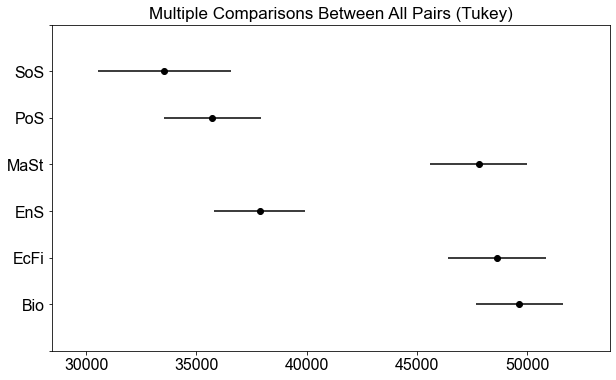

In [34]:
_ = tukey.plot_simultaneous()